In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np

In [3]:
data_dict = {}
renames = {
    "jdk" : "JVM",
    "graal": "GVM",
    "regular": "Full",
    "dispatch-no-trees" : "-DTree",
    "dispatch-no-cache" : "-DCache",
    "pure-meta": "-Hybrid",
    "queens2" : "queens"
}
for file in os.listdir("."):
    if file.endswith(".txt"):
        filename, _ = os.path.splitext(file)
        workload, tiger, dynsem, vm = filename.split('_')
        workload = renames[workload] if workload in renames else workload
        dynsem = renames[dynsem] if dynsem in renames else dynsem
        vm = renames[vm] if vm in renames else vm
        key = (workload, "{} {}".format(dynsem, vm))
        with open(file) as f:
            lines = f.readlines()
            lls = [int(e.strip()) for e in lines[:-1]]
            data_dict[key] = lls

In [4]:
df = pd.DataFrame(data_dict)[10:].reset_index(drop="true")


df.columns = pd.MultiIndex.from_tuples(df.columns, names=['Benchmark','Flavor'])

benchmarks = list({b[0] for b in data_dict.keys()})

for benchmark in benchmarks:
    median_jdk = df[benchmark]['Full JVM'].median()
    df[benchmark] = median_jdk / df[benchmark]

    
speedups = df.median()

speedups = speedups.reindex(list(reversed(list(speedups.index.get_level_values(1).unique()))), level='Flavor')

# speedups = speedups.swaplevel(i="Benchmark", j="Flavor")
# speedups = speedups.reindex(list(reversed(list(speedups.index.get_level_values(0).unique()))), level='Flavor')

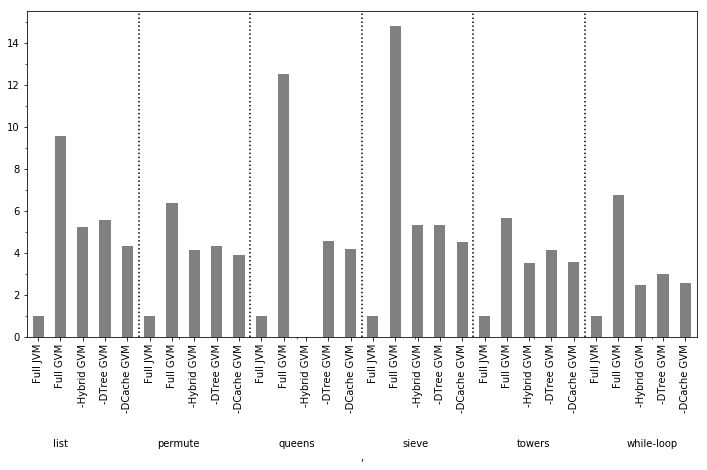

In [8]:
speedups.index.names = ['','']
ax = speedups.plot(kind="bar", figsize=(12, 6), color="Gray")
minor_locator = ticker.AutoMinorLocator(2)

ax.yaxis.set_minor_locator(minor_locator)
ax.set_xticklabels(speedups.index.get_level_values(1))
ax.set_xticklabels(speedups.index.get_level_values(0).unique(), minor=True)
ax.set_xticks(np.arange(1, len(speedups), 5.3), minor=True)

ax.tick_params(axis='x', which='minor', direction='out', pad=100)

ax.patch.set_alpha(0.5)


for x in np.arange(4, 25, 5):
    plt.axvline(x=x+.5, color='k', linestyle=":")
    

plt.savefig("dynsem-relative-speedups.pdf", format='pdf', bbox_inches='tight')
plt.show()